1.Load Dataset --> CSV file,Database,Web API,Files,Self.

2.Import Algorithm - Linear Regression for today

3.Training/Fitting the Algorithm - Searching for the best line 

4.Getting Predictions 

5.For the case of Linear Regression - How to get manual predictions

6.Getting the goodness of fit - RMSE/R-squared R^2

7.Different Models

### 1.Load Dataset --> CSV file,Database,Web API,Files,Self.

In [50]:
from sklearn.datasets import load_boston

In [51]:
data = load_boston()

In [52]:
print(type(data))

<class 'sklearn.utils.Bunch'>


In [53]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [54]:
x = data['data']

In [55]:
type(x)

numpy.ndarray

In [56]:
x.shape

(506, 13)

In [57]:
y = data['target']

In [58]:
type(y)

numpy.ndarray

In [59]:
y.shape

(506,)

### 2.Import Algorithm - Linear Regression for today

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
#create the object
model = LinearRegression()

### 3.Training/Fitting the Algorithm - Searching for the best line 

In [62]:
#this is to find the best fit line i.e best slope(m1-m13) and intercept(b) at the given data points
model.fit(x,y);

In [63]:
#this is to find the coefficients and parameters we use .coef_ and .intercept_ attributes
print(model.coef_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [64]:
print(model.intercept_)

36.459488385089855


### 4.Getting Predictions

In [65]:
model.predict([[100]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 13 is different from 1)

In [66]:
# to get the predictions we use .predict()
preds = model.predict(x)

In [67]:
preds.shape

(506,)

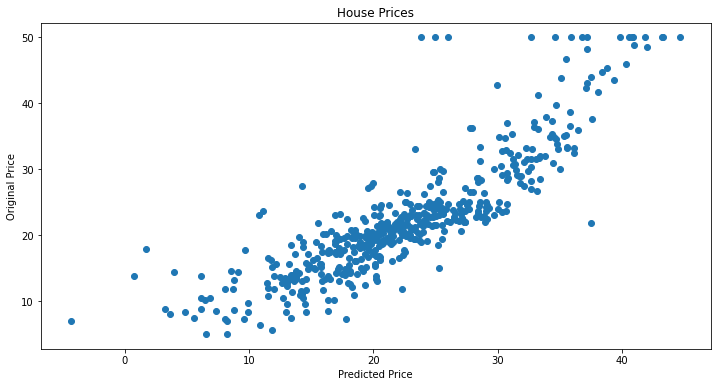

In [68]:
#preds is what the linear regression model gives the price of the house
# we also have original prices in the MEDV column or y

#let's make a scatter plot of preds and y
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(preds,y);
plt.xlabel('Predicted Price')
plt.ylabel('Original Price')
plt.title('House Prices');

In [69]:
preds

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

### 5.For the case of Linear Regression - How to get manual predictions


In [70]:
import numpy as np

In [71]:
x_trans = x.transpose()

In [72]:
x_trans.shape

(13, 506)

In [73]:
M = model.coef_.reshape(13,1)

In [74]:
M.shape

(13, 1)

In [75]:
x.shape

(506, 13)

In [76]:
B = model.intercept_

In [77]:
#(13x1)(506x13) + 34.45 
#y = mx + c
preds_manual = np.matmul(x,M) + B

In [78]:
preds_manual.transpose()

array([[30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
        25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
        18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
        19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
        12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
        13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
        11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
        23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
        34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
        22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
        21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
        31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
        17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
        30.36148358, 25.53056512, 21.11338564, 17.4

In [79]:
preds_manual.shape

(506, 1)

### 6.Getting the goodness of fit - RMSE/R-squared R^2

In [80]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [81]:
r2_score(y,preds)

0.7406426641094095

In [82]:
np.sqrt(mean_squared_error(y,preds))

4.679191295697281

### 7.Different Models

mdv = m1x1 + m2x2 +.......... + m3x3 + b

Model 1  medv = m1x1  b

Model 2 medv = m1x1 + m2x2 + b

Model 13 medv = m1x1 + m2x2 + m3x3 +........... + m13x13 b



In [83]:
model_list = []
r2_vals = []
rmse_vals = []

to_remove = [3,9]

for i in range(0,x.shape[1]):
    
    if i in to_remove:
        continue;
    lr = LinearRegression()
    lr.fit(x[:,0:i+1],y)
    model_list.append(lr)
    preds = lr.predict(x[:,0:i+1])
    r2_vals.append(r2_score(y,preds))
    rmse_vals.append(np.sqrt(mean_squared_error(y,preds)))

In [84]:
r2_vals

[0.15078046904975717,
 0.23398843834155303,
 0.29371357158118705,
 0.3313127012223386,
 0.5873769620476353,
 0.5894901581984897,
 0.6311487593039973,
 0.6319478530107927,
 0.670314087527277,
 0.6842042799773888,
 0.7406426641094095]

In [85]:
import pandas as pd

results = pd.DataFrame({'numCols' : [1,2,4,5,6,7,8,10,11,12,13],'r2_vals': r2_vals,'rmse':rmse_vals})
results

,numCols,r2_vals,rmse
0,1,0.150780,8.467038
1,2,0.233988,8.041539
2,4,0.293714,7.721683
3,5,0.331313,7.513340
4,6,0.587377,5.901987
5,7,0.589490,5.886855
6,8,0.631149,5.580166
7,10,0.631948,5.574119
8,11,0.670314,5.275598
9,12,0.684204,5.163268


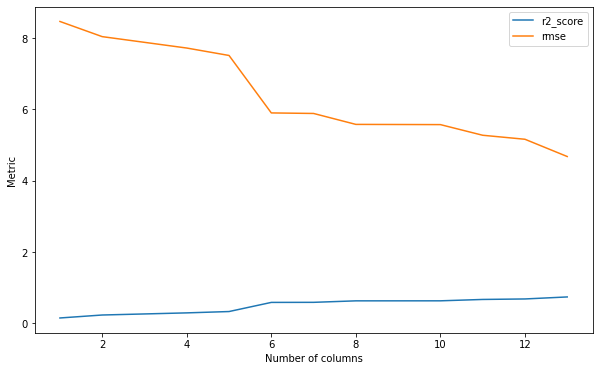

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(results['numCols'],results['r2_vals'],label = 'r2_score')
plt.plot(results['numCols'],results['rmse'],label = 'rmse')
plt.xlabel('Number of columns')
plt.ylabel('Metric')
plt.legend();